___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# K Nearest Neighbors Project 

Welcome to the KNN Project! This will be a simple project very similar to the lecture, except you'll be given another data set. Go ahead and just follow the directions below.
## Import Libraries
**Import pandas,seaborn, and the usual libraries.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data
** Read the 'KNN_Project_Data csv file into a dataframe **

In [2]:
data_knn = pd.read_csv('KNN_Project_Data')

**Check the head of the dataframe.**

In [3]:
data_knn.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


# EDA

Since this data is artificial, we'll just do a large pairplot with seaborn.

**Use seaborn on the dataframe to create a pairplot with the hue indicated by the TARGET CLASS column.**

In [4]:
data_knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   XVPM          1000 non-null   float64
 1   GWYH          1000 non-null   float64
 2   TRAT          1000 non-null   float64
 3   TLLZ          1000 non-null   float64
 4   IGGA          1000 non-null   float64
 5   HYKR          1000 non-null   float64
 6   EDFS          1000 non-null   float64
 7   GUUB          1000 non-null   float64
 8   MGJM          1000 non-null   float64
 9   JHZC          1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


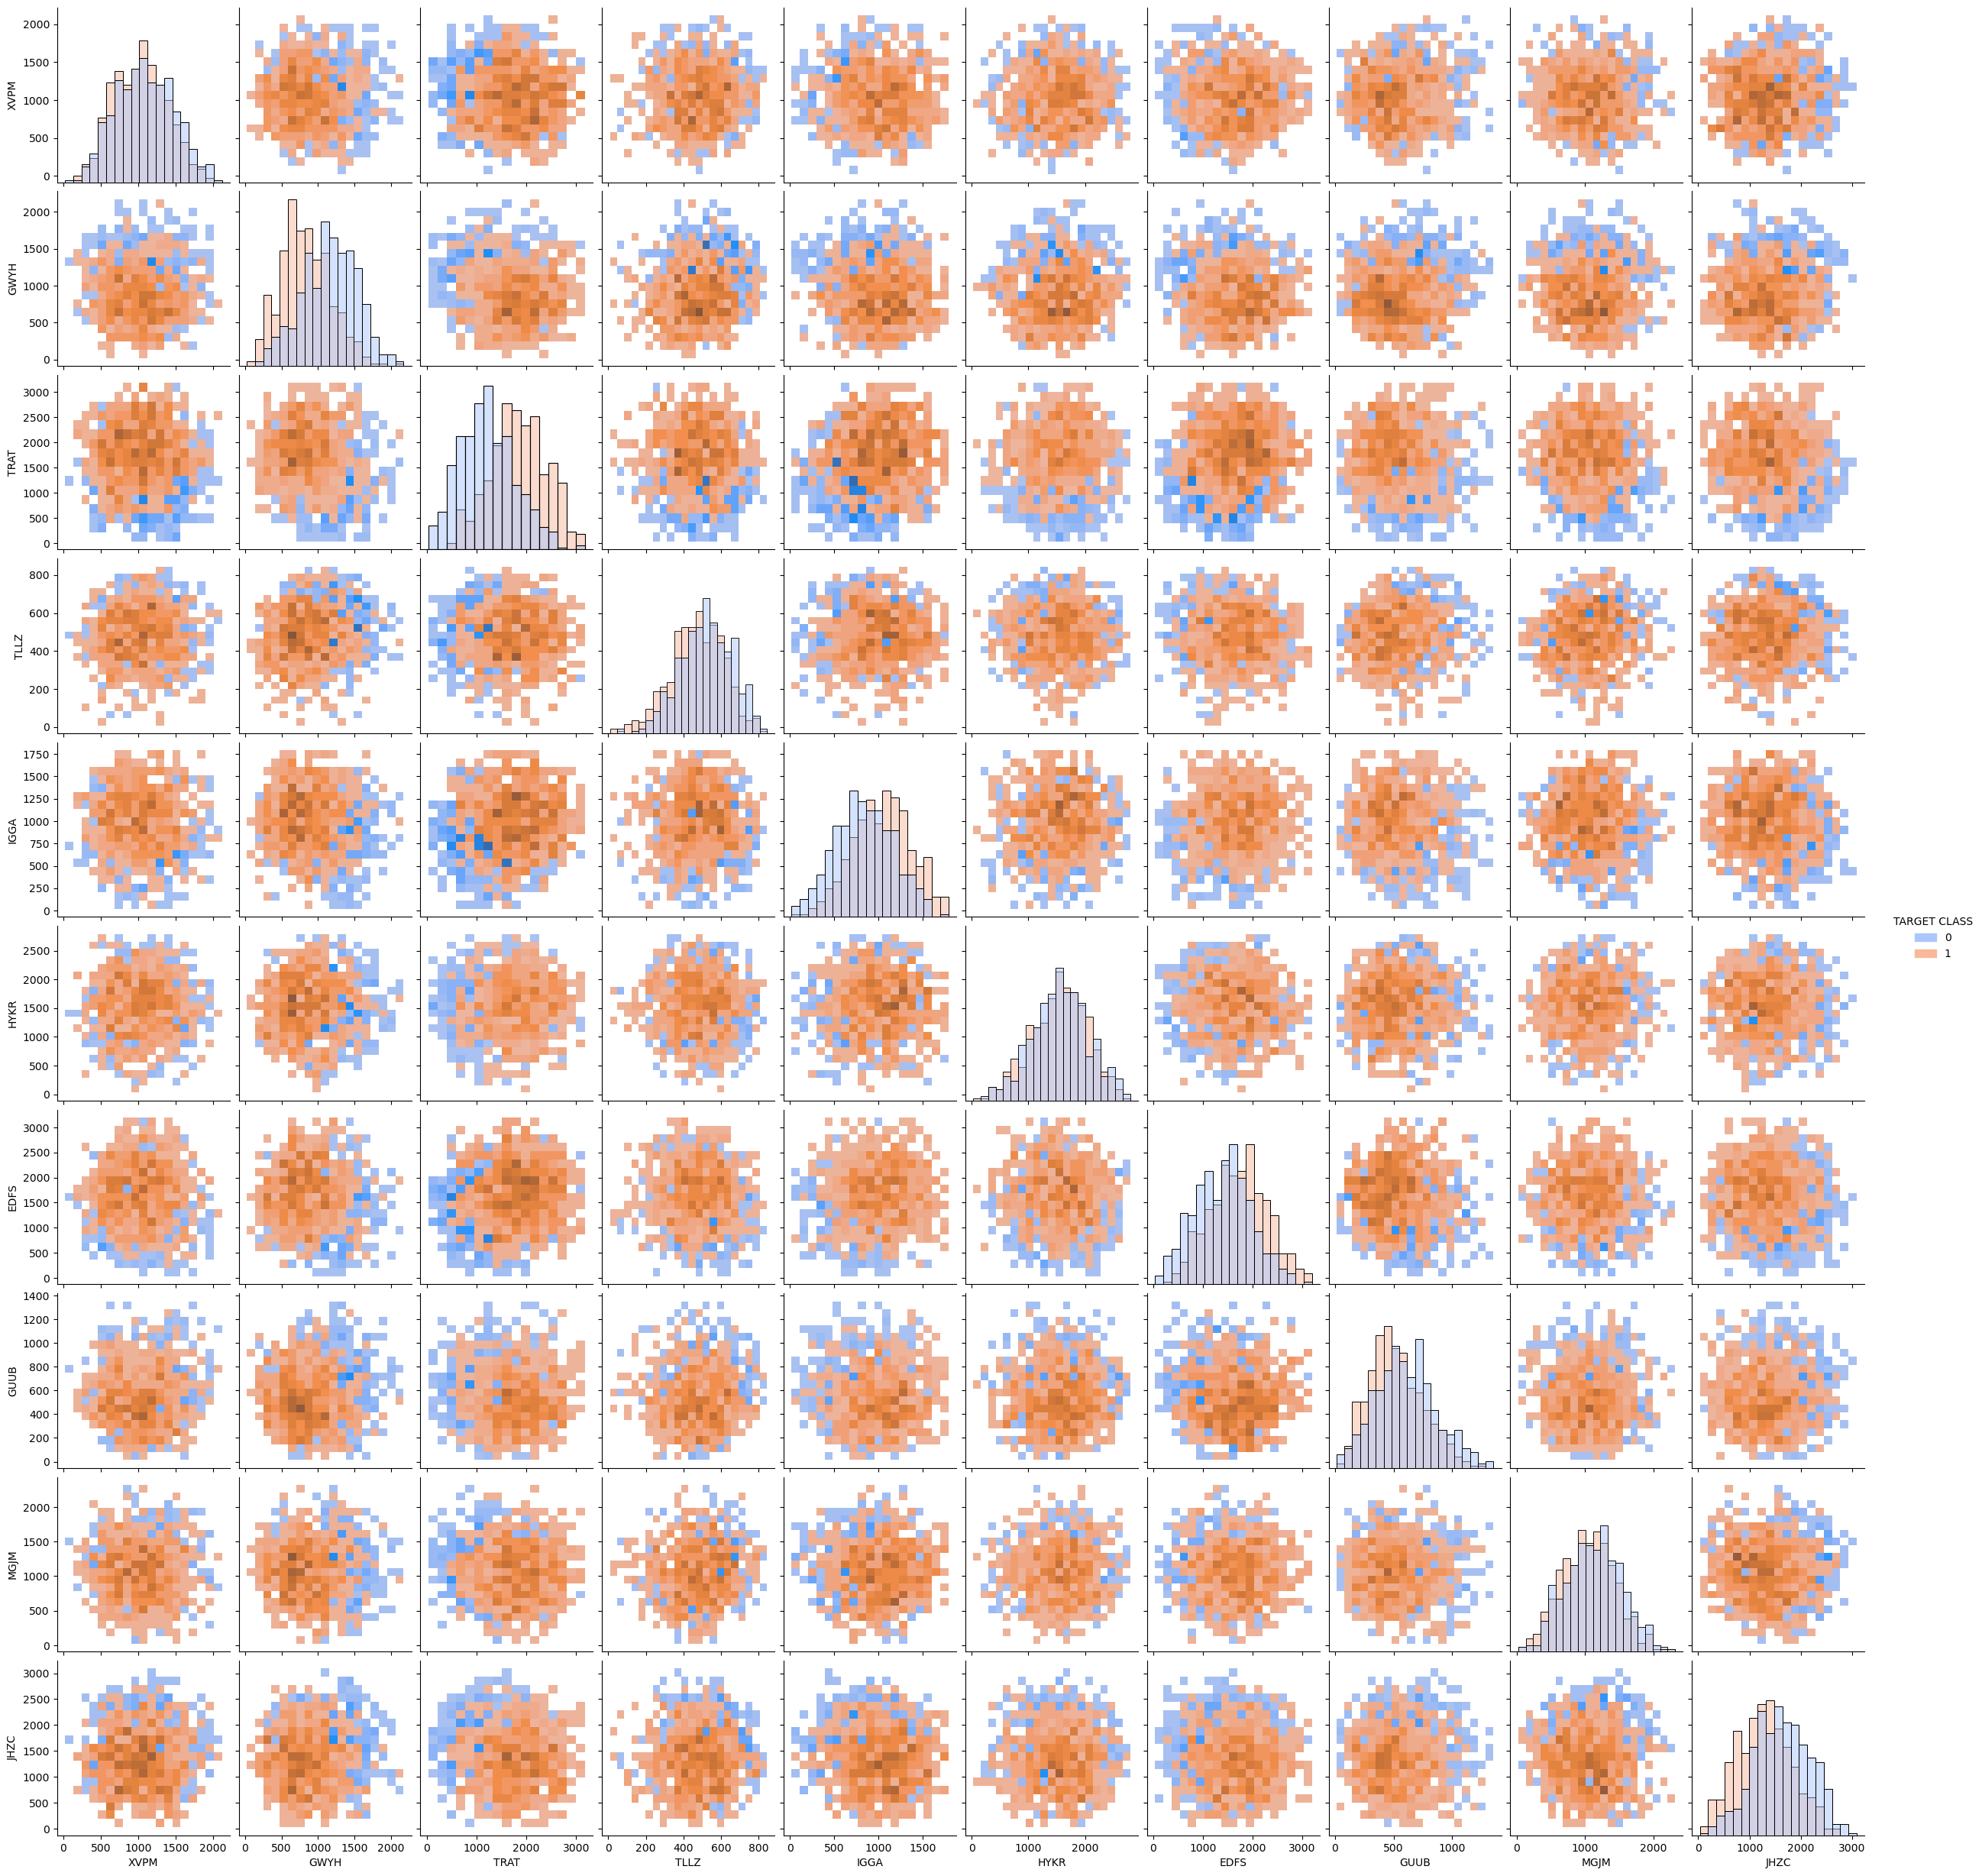

In [20]:
sns.pairplot(data=data_knn, hue='TARGET CLASS', kind='hist', palette='coolwarm')

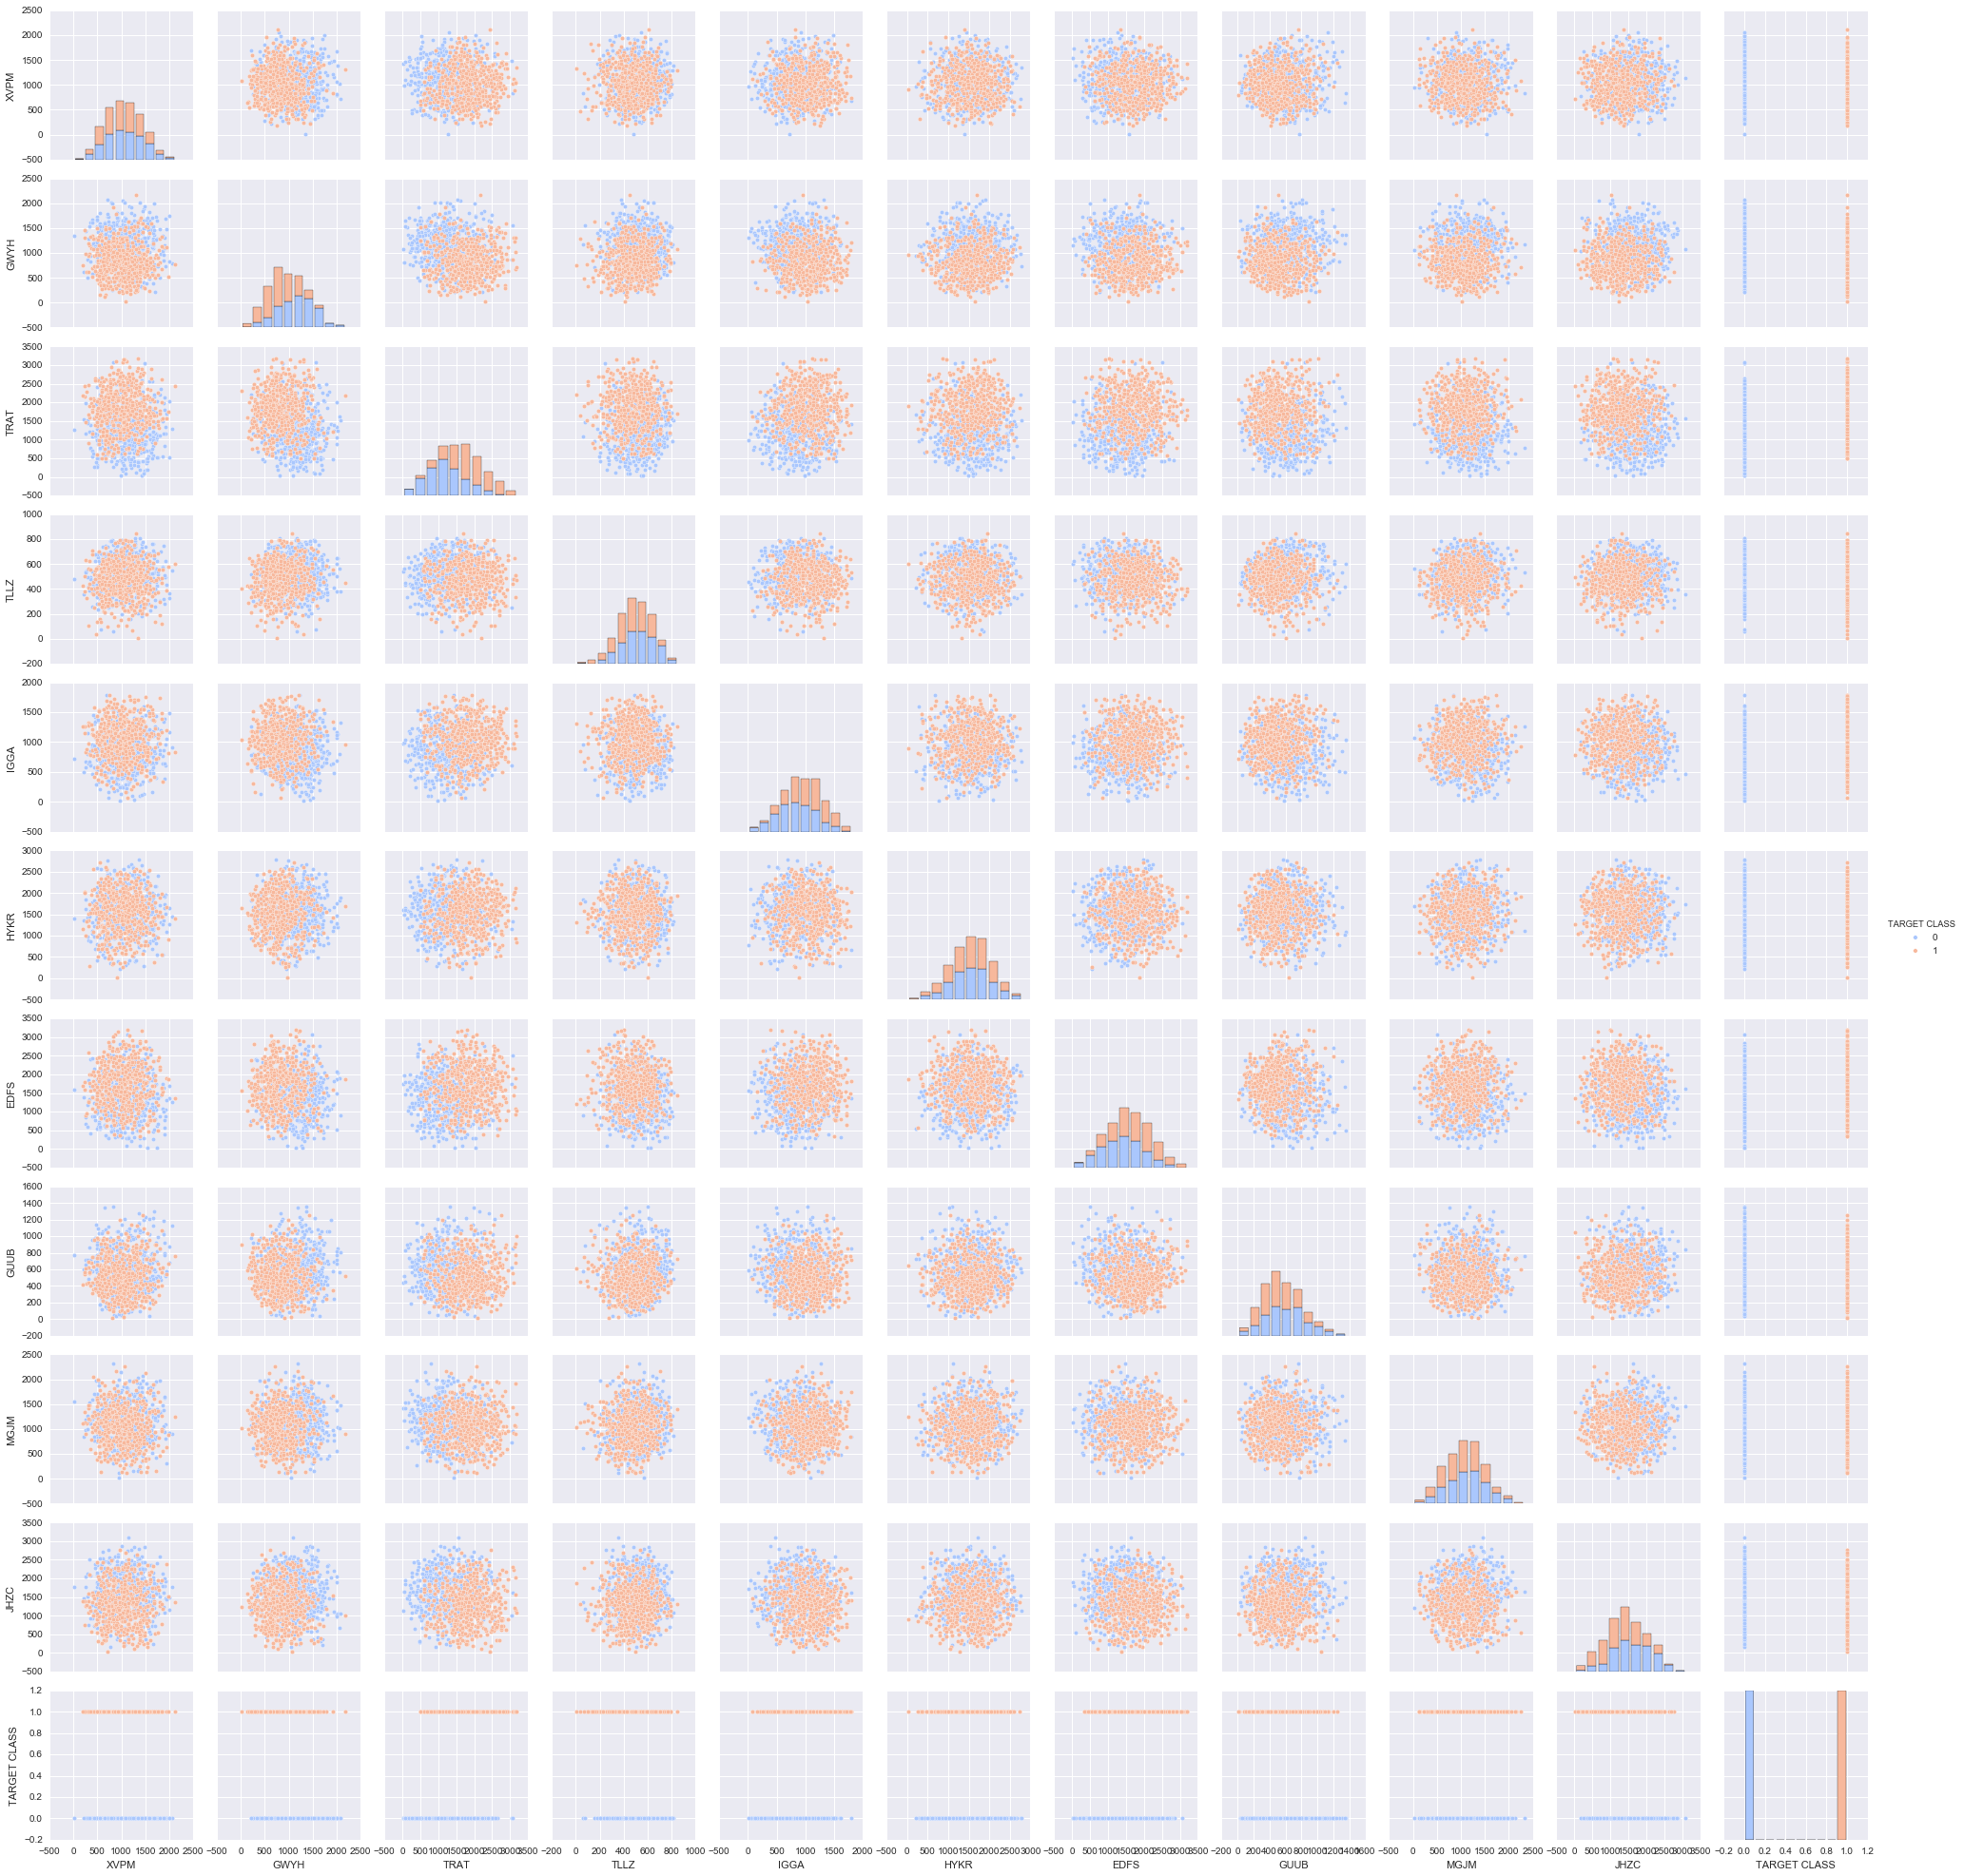

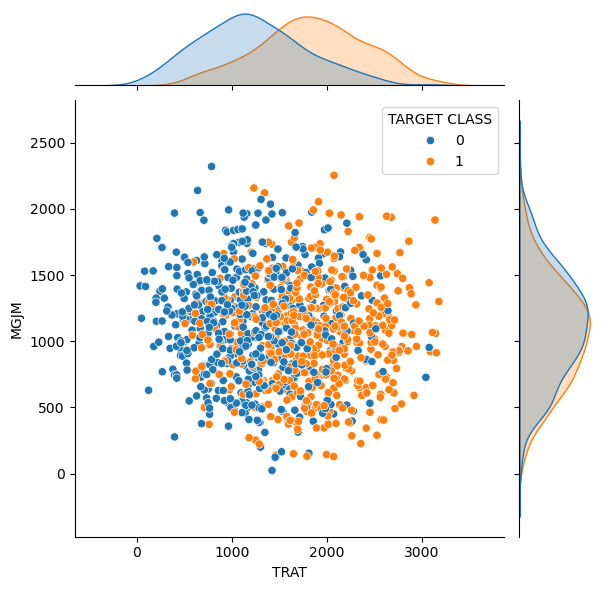

In [55]:
# Do jointplot for two var if we see separation for the hue (target column) to explore this further
sns.jointplot(data=data_knn, x='TRAT', y= 'MGJM', hue= 'TARGET CLASS')

# Standardize the Variables

Time to standardize the variables.

** Import StandardScaler from Scikit learn.**

In [9]:
from sklearn.preprocessing import StandardScaler # import SS class from the preprocessing family

In [10]:
scaler = StandardScaler() # create an object by instanciating SS

** Create a StandardScaler() object called scaler.**

In [12]:
scaler.fit(data_knn.drop('TARGET CLASS', axis=1))

StandardScaler()

** Fit scaler to the features.**

StandardScaler(copy=True, with_mean=True, with_std=True)

**Use the .transform() method to transform the features to a scaled version.**

In [13]:
scaled_features = scaler.transform(data_knn.drop('TARGET CLASS', axis=1)) #numpy array

In [16]:
scaled_features

array([[ 1.56852168, -0.44343461,  1.61980773, ..., -0.93279392,
         1.00831307, -1.06962723],
       [-0.11237594, -1.05657361,  1.7419175 , ..., -0.46186435,
         0.25832069, -1.04154625],
       [ 0.66064691, -0.43698145,  0.77579285, ...,  1.14929806,
         2.1847836 ,  0.34281129],
       ...,
       [-0.35889496, -0.97901454,  0.83771499, ..., -1.51472604,
        -0.27512225,  0.86428656],
       [ 0.27507999, -0.99239881,  0.0303711 , ..., -0.03623294,
         0.43668516, -0.21245586],
       [ 0.62589594,  0.79510909,  1.12180047, ..., -1.25156478,
        -0.60352946, -0.87985868]])

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [21]:
df_feat = pd.DataFrame(scaled_features,columns=data_knn.columns[:-1])

In [22]:
df_feat.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


# Train Test Split

**Use train_test_split to split your data into a training set and a testing set.**

In [23]:
from sklearn.model_selection import train_test_split

In [25]:
X = df_feat

In [26]:
y = data_knn['TARGET CLASS']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# Using KNN

**Import KNeighborsClassifier from scikit learn.**

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
knn = KNeighborsClassifier(n_neighbors=1)

**Create a KNN model instance with n_neighbors=1**

In [30]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

**Fit this KNN model to the training data.**

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

# Predictions and Evaluations
Let's evaluate our KNN model!

**Use the predict method to predict values using your KNN model and X_test.**

In [31]:
pred = knn.predict(X_test)

** Create a confusion matrix and classification report.**

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

In [33]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72       152
           1       0.71      0.72      0.72       148

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



In [35]:
print(confusion_matrix(y_test,pred))

[[109  43]
 [ 41 107]]


[[112  40]
 [ 34 114]]


             precision    recall  f1-score   support

          0       0.77      0.74      0.75       152
          1       0.74      0.77      0.75       148

avg / total       0.75      0.75      0.75       300



# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!

** Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.**

In [50]:
error_rate=[]

In [51]:
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test) #predict the labels for the test data
     #print(y_test != pred) -> False or True
    error_rate.append(np.mean(y_test != pred)) # mean error from the differences btw the predictions and true labels

In [52]:
error_rate

[0.28,
 0.29,
 0.21666666666666667,
 0.22,
 0.20666666666666667,
 0.21,
 0.18333333333333332,
 0.19,
 0.19,
 0.17666666666666667,
 0.18333333333333332,
 0.18333333333333332,
 0.18333333333333332,
 0.18,
 0.18,
 0.18,
 0.17,
 0.17333333333333334,
 0.17666666666666667,
 0.18333333333333332,
 0.17666666666666667,
 0.18333333333333332,
 0.16666666666666666,
 0.18,
 0.16666666666666666,
 0.17,
 0.16666666666666666,
 0.17333333333333334,
 0.16666666666666666,
 0.17333333333333334,
 0.16,
 0.16666666666666666,
 0.17333333333333334,
 0.17333333333333334,
 0.17,
 0.16666666666666666,
 0.16,
 0.16333333333333333,
 0.16]

**Now create the following plot using the information from your for loop.**

Text(0, 0.5, 'Error Rate')

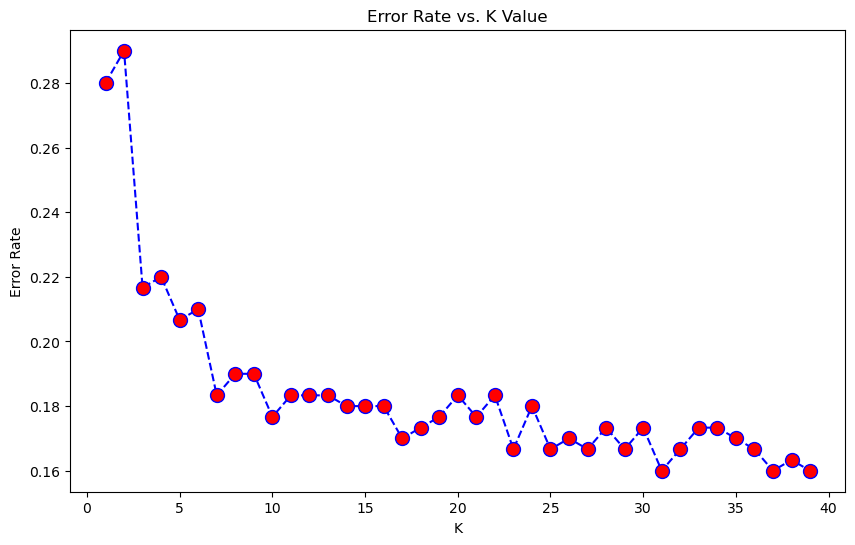

In [53]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

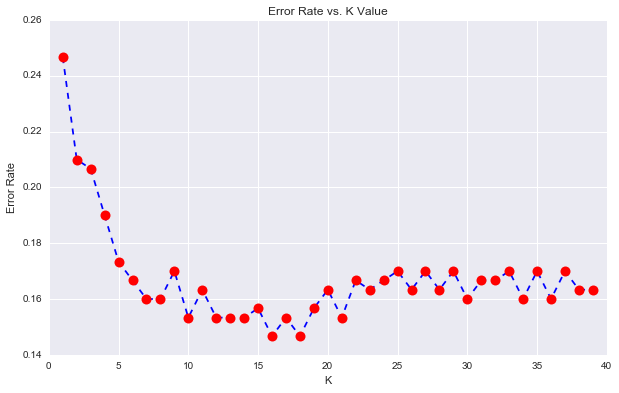

## Retrain with new K Value

**Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.**

In [43]:
knn = KNeighborsClassifier(n_neighbors=16)

In [44]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=16)

In [45]:
newpred= knn.predict(X_test)

In [46]:
print(classification_report(y_test,newpred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       152
           1       0.83      0.80      0.82       148

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300



In [47]:
print(confusion_matrix(y_test, newpred))

[[127  25]
 [ 29 119]]


WITH K=30


[[127  25]
 [ 23 125]]


             precision    recall  f1-score   support

          0       0.85      0.84      0.84       152
          1       0.83      0.84      0.84       148

avg / total       0.84      0.84      0.84       300



# Great Job!